<a href="https://colab.research.google.com/github/mlfigueiredo/CienciaDosDados/blob/main/Prevendo_Fadiga_de_Funcion%C3%A1rios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='PURPLE'> Prevendo Esgotamento dos Funcionários no Sistema Financeiro</font>

O Dia Mundial da Saúde Mental é comemorado em 10 de outubro de cada ano. O objetivo deste dia é **aumentar a conscientização sobre as questões de saúde mental em todo o mundo** e mobilizar esforços em apoio à saúde mental. 


![](https://sertms.com/wp-content/uploads/2020/10/post_thumbnail-327dbe80b7dac1312e066b24a6e678bd.jpg) 



De acordo com uma pesquisa anônima, cerca de **450 milhões de pessoas vivem com transtornos mentais** que podem ser uma das principais causas de problemas de saúde e deficiência em todo o mundo.


![](https://otimiza.pro/wp-content/uploads/2020/10/sindrome-de-burnout-e-saude-bucal9.jpg)


Você é um Cientista de Dados em uma empresa. Você tem a tarefa de **compreender e observar a saúde mental de todos os funcionários de sua empresa**. 

Portanto, você deve **prever a taxa de esgotamento dos funcionários com base nos recursos fornecidos**, ajudando assim a empresa a tomar as medidas adequadas para que seus funcionários não fiquem assim...

![](https://i.gifer.com/ZGYd.gif)

# <font color='GREY'> Empresas Bem Conceituadas em Relação à Qualidade de Vida dos Funcionários</font>
######Fonte: https://exame.com/carreira/as-50-empresas-que-tem-os-funcionarios-mais-felizes-no-brasil/

![](https://mir-s3-cdn-cf.behance.net/project_modules/fs/95989f68415161.5b5cbc9821554.gif)

![](https://cienciadosdados.com/images/2021/creditas.png)

#1° Problema de Negócio


![](https://media.giphy.com/media/l46CeDBwmtMi1ddkc/giphy.gif)

#### Precisamos **prever a taxa de esgotamento dos funcionários com base nos recursos fornecidos**, ajudando assim a empresa a tomar as medidas adequadas para a saúde Mental dos seus colaboradores.


#2° Análise Exploratória dos Dados


#### Fontes:
https://www.kaggle.com/redwankarimsony/hackerearth-employee-burnout-challenge

![](https://cienciadosdados.com/images/2021/ad_rh.png)

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import  train_test_split

#import lightgbm and xgboost 
import lightgbm as lgb 
import xgboost as xgb 

# Avaliação da Máquina Preditiva
from sklearn.metrics import mean_squared_error, r2_score
import math

In [3]:
# Importando o dataset
df = pd.read_csv("/content/RH_Data_Fatige.csv", sep = ",")

#Vendo as primeiras linhas
print("shape of dataframe is : ", df.shape)
df.head()

shape of dataframe is :  (22750, 9)


,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


#### Estatísticas das Variáveis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


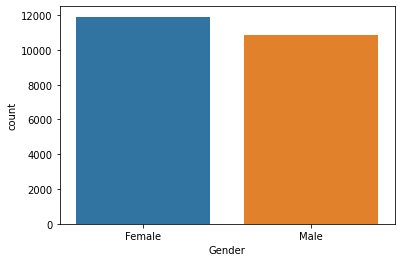

In [5]:
df['Gender'].value_counts()
sns.countplot(df['Gender'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


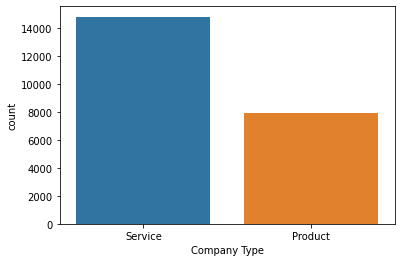

In [6]:
df['Company Type'].value_counts()
sns.countplot(df['Company Type'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


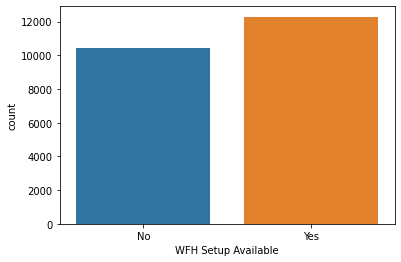

In [ ]:
df['WFH Setup Available'].value_counts()
sns.countplot(df['WFH Setup Available'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


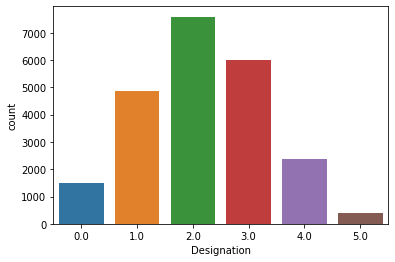

In [ ]:
df['Designation'].value_counts()
sns.countplot(df['Designation'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


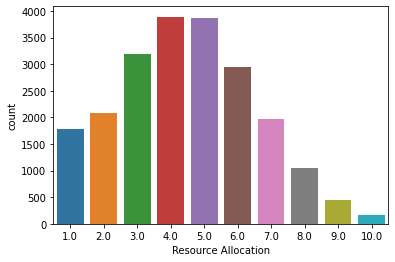

In [ ]:
df['Resource Allocation'].value_counts()
sns.countplot(df['Resource Allocation'])

In [9]:
# Check for missing values
df.isna().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [ ]:
#Checking null value percentage column wise
df.isnull().mean()*100

Employee ID             0.000000
Date of Joining         0.000000
Gender                  0.000000
Company Type            0.000000
WFH Setup Available     0.000000
Designation             0.000000
Resource Allocation     6.070330
Mental Fatigue Score    9.305495
Burn Rate               4.940659
dtype: float64

In [11]:
df.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [16]:
df.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


#3° Pré-Processamento dos Dados

In [13]:
#function to find out total days
def create_days_count(data):
    return (current_date - data["Date of Joining"])

In [15]:
#Converting date of joining column to pandas datetime format
df["Date of Joining"] = pd.to_datetime(df["Date of Joining"])

### Imputação de Valores Missing

In [17]:
#Null Value Imputation
rev_null=['Resource Allocation','Mental Fatigue Score','Burn Rate']
df[rev_null]=df[rev_null].replace({np.nan:df['Resource Allocation'].mean(),
                                   np.nan:df['Burn Rate'].mean(),
                                   np.nan:df['Mental Fatigue Score'].mean(),
                                   })


In [18]:
#Checking null value percentage column wise
df.isnull().mean()*100

Employee ID             0.0
Date of Joining         0.0
Gender                  0.0
Company Type            0.0
WFH Setup Available     0.0
Designation             0.0
Resource Allocation     0.0
Mental Fatigue Score    0.0
Burn Rate               0.0
dtype: float64

#### Engenharia de Atributos - Criando campo "dias de trabalho"

In [24]:
#get todays date time
current_date = pd.to_datetime('today')  
#Creating new column days_count
df["days_count"] = df.apply(create_days_count, axis=1).dt.days

In [25]:
current_date

Timestamp('2022-11-03 23:02:57.158446')

In [26]:
df.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,days_count
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.000000,3.8,0.16,5147
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.000000,5.0,0.36,5086
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,5.728188,5.8,0.49,5351
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.000000,2.6,0.20,5113
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.000000,6.9,0.52,5215


#### LabelEncoder - Variáveis não numéricas

In [27]:
df['Gender']=df['Gender'].map({'Male':1,'Female':0})

In [28]:
df['Company Type']=df['Company Type'].map({'Service':1,'Product':0})

In [29]:
df['WFH Setup Available']=df['WFH Setup Available'].map({'Yes':1,'No':0})

In [30]:
df.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,days_count
0,fffe32003000360033003200,2008-09-30,0,1,0,2.0,3.000000,3.8,0.16,5147
1,fffe3700360033003500,2008-11-30,1,1,1,1.0,2.000000,5.0,0.36,5086
2,fffe31003300320037003900,2008-03-10,0,0,1,2.0,5.728188,5.8,0.49,5351
3,fffe32003400380032003900,2008-11-03,1,1,1,1.0,1.000000,2.6,0.20,5113
4,fffe31003900340031003600,2008-07-24,0,1,0,3.0,7.000000,6.9,0.52,5215


In [31]:
df.describe()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,days_count
count,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000
mean,0.476571,0.652000,0.540220,2.178725,4.557083,5.728188,0.712684,5237.605495
std,0.499462,0.476346,0.498391,1.135145,2.006312,1.829281,1.159673,105.348190
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5055.000000
25%,0.000000,0.000000,0.000000,1.000000,3.000000,4.700000,0.320000,5147.000000
50%,0.000000,1.000000,1.000000,2.000000,5.000000,5.728188,0.470000,5237.000000
75%,1.000000,1.000000,1.000000,3.000000,6.000000,6.900000,0.610000,5329.000000
max,1.000000,1.000000,1.000000,5.000000,10.000000,10.000000,5.728188,5420.000000


In [32]:
#Checking null value percentage column wise
df.isnull().mean()*100

Employee ID             0.0
Date of Joining         0.0
Gender                  0.0
Company Type            0.0
WFH Setup Available     0.0
Designation             0.0
Resource Allocation     0.0
Mental Fatigue Score    0.0
Burn Rate               0.0
days_count              0.0
dtype: float64

### Eliminando Variáveis que não são explicativas para a previsão

In [33]:
#We will drop employeeid and date of joining columns.
df.drop(["Employee ID","Date of Joining"],axis=1,inplace=True)

In [34]:
df

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,days_count
0,0,1,0,2.0,3.000000,3.800000,0.16,5147
1,1,1,1,1.0,2.000000,5.000000,0.36,5086
2,0,0,1,2.0,5.728188,5.800000,0.49,5351
3,1,1,1,1.0,1.000000,2.600000,0.20,5113
4,0,1,0,3.0,7.000000,6.900000,0.52,5215
...,...,...,...,...,...,...,...,...
22745,0,1,0,1.0,3.000000,5.728188,0.41,5056
22746,0,0,1,3.0,6.000000,6.700000,0.59,5402
22747,1,1,1,3.0,7.000000,5.728188,0.72,5111
22748,0,1,0,2.0,5.000000,5.900000,0.52,5411


In [35]:
#criando variáveis ​​independentes como X e variável alvo / dependente como y
y= df.pop("Mental Fatigue Score")
X= df

In [37]:
X

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Burn Rate,days_count
0,0,1,0,2.0,3.000000,0.16,5147
1,1,1,1,1.0,2.000000,0.36,5086
2,0,0,1,2.0,5.728188,0.49,5351
3,1,1,1,1.0,1.000000,0.20,5113
4,0,1,0,3.0,7.000000,0.52,5215
...,...,...,...,...,...,...,...
22745,0,1,0,1.0,3.000000,0.41,5056
22746,0,0,1,3.0,6.000000,0.59,5402
22747,1,1,1,3.0,7.000000,0.72,5111
22748,0,1,0,2.0,5.000000,0.52,5411


### Fazendo a Amostragem dos Dados - Partition

In [40]:
#Let’s split X and y using Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state= 42)

#get shape of train and test data
print("train data size:",X_train.shape)
print("test data size:",X_test.shape)

train data size: (18200, 7)
test data size: (4550, 7)


#4° Construíndo a Máquina Preditiva 


In [45]:
#build model
xgb_model = xgb.XGBRegressor()
#lgb_model = lgb.LGBMRegressor(n_estimators=200)


In [46]:
# treinamento
#lgb_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

[23:19:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [47]:
#y_predict= lgb_model.predict(X_test)
y_predict= xgb_model.predict(X_test)


#5° Avaliação da Máquina Preditiva

In [48]:
# Calcula a métrica R2 do nosso modelo
r2_score(y_test, y_predict)
#r2_score(y_test, lgb_model.fit(X_train, y_train).predict(X_test))

0.8160634088228313

XGB R2 = 0.8160

LGB R2 = 0.8050

```
# Isto está formatado como código
```



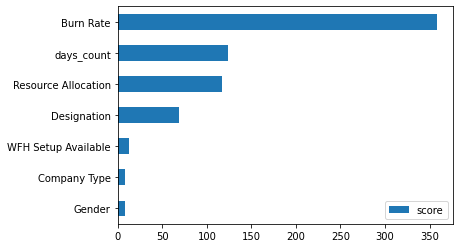

In [50]:
feature_important = xgb_model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending= True)
data.plot(kind='barh')

In [51]:
#RMSE
Rmse_test = math.sqrt(mean_squared_error(y_test,y_predict))
print("RMSE: {:.2f}".format(Rmse_test))

RMSE: 0.78
